In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] # 设置字体为黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus']=False # 解决Matplotlib坐标轴负号'-'显示为方块的问题

### $\gamma$能谱分析

In [3]:
df = pd.read_csv(r"C:\Users\31260\Desktop\近代物理实验\D9 虚拟康普顿散射实验\60Co全段.txt")
data = df.head(8200)

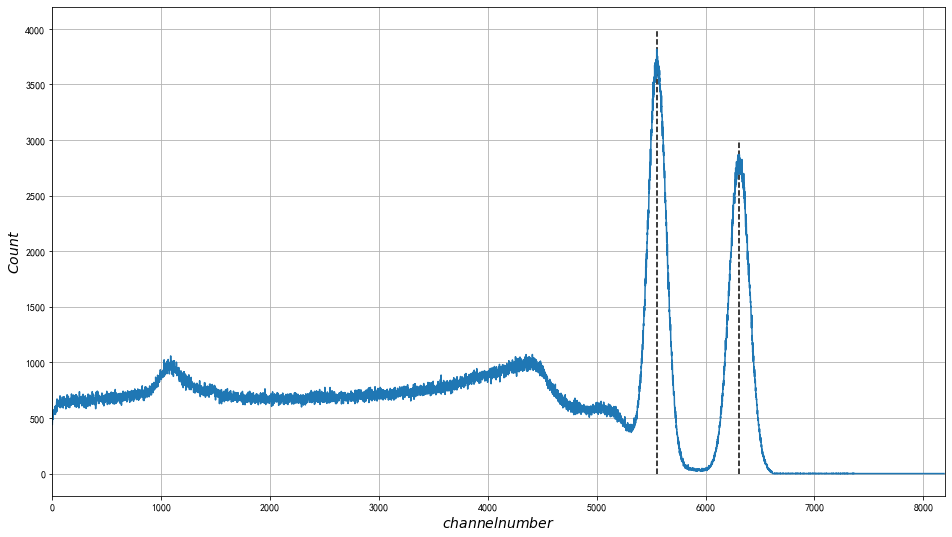

In [37]:
x = np.linspace(0, 8190, 8191)

plt.subplots(figsize = (16, 9))
plt.plot(x, data)
plt.vlines(5554.5, 0, 4000, ls = '--')
plt.vlines(6310.5, 0, 3000, ls = '--')

plt.xlabel(r'$channel number$', fontsize = 14)
plt.ylabel(r'$Count$', fontsize = 14)
plt.xlim(0, 8200)
plt.grid()
plt.show()

In [38]:
def f(x, a, b):
    return a*x + b

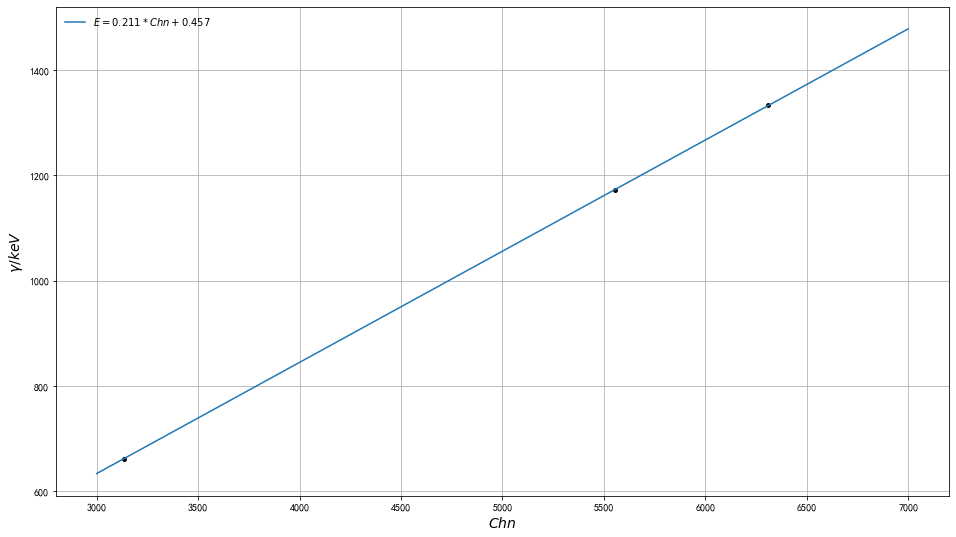

In [50]:
C = [3133, 5554.5, 6310.5]
E = [662, 1173, 1333]
popt, pcov = curve_fit(f, C, E)

c_dense = np.linspace(3000, 7000, 10000)
plt.subplots(figsize = (16, 9))
plt.scatter(C, E, s = 15, c = 'k')
plt.plot(c_dense, f(c_dense, popt[0], popt[1]), label = '$E = {:.3f}* Chn + {:.3f}$'.format(popt[0], popt[1]))

plt.xlabel(r'$Chn$', fontsize = 14)
plt.ylabel(r'$\gamma/keV$', fontsize = 14)
plt.legend(frameon = False)
plt.grid()
plt.show()

In [47]:
sst, sse, ssr, q = 0, 0, 0, []

for i in range(3):
    sst += (E[i] - np.mean(E))**2
    q.append(f(C[i], popt[0], popt[1]))
    ssr += (q[i] - np.mean(E))**2
    sse += (np.array(E)[i] - np.array(q)[i])**2
1- sse/sst

0.9999996889063485

#### 道址是采样点的意思，换算关系有$E=\frac{40}{189}x-2.\dot{5}$

In [5]:
pip install jupyterlab-language-pack-zh-CN

Note: you may need to restart the kernel to use updated packages.


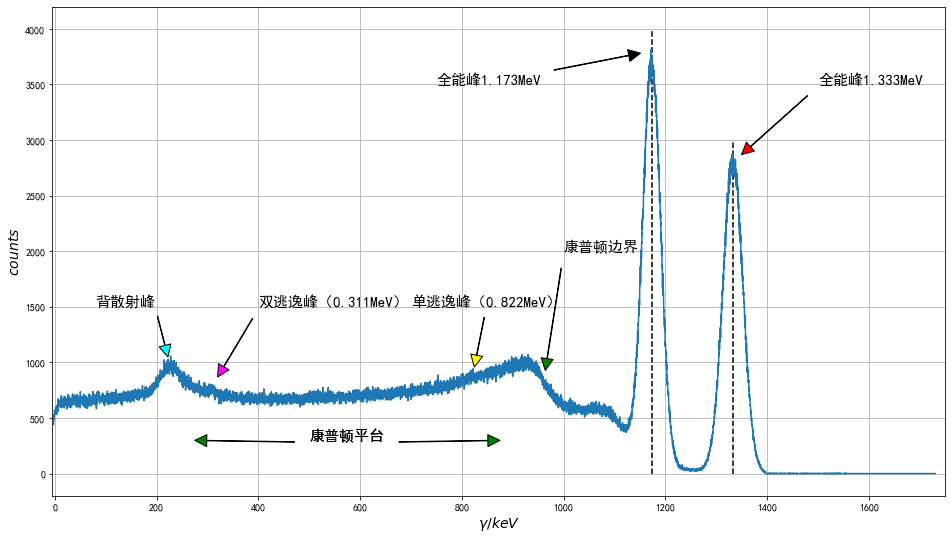

In [6]:
x_e = np.linspace(-2.5556, 1730.7778, 8191)

plt.subplots(figsize = (16, 9))
plt.plot(x_e, data)
plt.vlines(1173, 0, 4000, ls = '--')
plt.vlines(1333, 0, 3000, ls = '--')

plt.annotate("背散射峰", fontsize = 15, xytext = (80, 1500), xy=(225, 1000),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'cyan'})
plt.annotate("双逃逸峰（0.311MeV）", fontsize = 15, xytext = (400, 1500), xy=(311, 800),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
plt.annotate("单逃逸峰（0.822MeV）", fontsize = 15, xytext = (700, 1500), xy=(822, 900),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'yellow'})
plt.annotate("全能峰1.173MeV", fontsize = 15, xytext = (750, 3500), xy=(1173, 3800),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'black'})
plt.annotate("全能峰1.333MeV", fontsize = 15, xytext = (1500, 3500), xy=(1333, 2800),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'red'})

plt.annotate("康普顿平台", fontsize = 15, xytext = (500, 300), xy=(250, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'green'})
plt.annotate("康普顿平台", fontsize = 15, xytext = (500, 300), xy=(900, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'green'})
plt.annotate("康普顿边界", fontsize = 15, xytext = (1000, 2000), xy=(960, 810),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'green'})

plt.ylabel(r'$counts$', fontsize = 14)
plt.xlabel(r'$\gamma/keV$', fontsize = 14)
plt.xlim(-5, 1750)
plt.grid()
plt.show()

### $\mathbf{\gamma}$射线吸收系数的测量

In [7]:
d = [0, 1, 2, 3, 4, 5]
E_122 = [8109.47, 1699.26, 1405.75, 1297.26, 1211.82, 1048.53]
E_245 = [2144.26, 1411.67, 953.69, 771.13, 720.22, 670.87]
E_344 = [4517.38, 3221.62, 2168.19, 1454.16, 1172.59, 874.93]
E_511 = [19123.20, 13574.04, 9705.10, 6925.02, 4909.42, 3489.30]
E_662 = [19130.77, 14754.44, 10991.98, 8301.08, 6255.26, 4716.14]
E_779 = [1276.02, 1124.17, 1015.97, 895.78, 750.09, 697.99]
E_835 = [17766.97, 13938.92, 10946.08, 8572.12, 6724.24, 5290.16]

In [8]:
def absorb_func(x, a, u, c):
    return a * np.exp((-u) * x) + c

In [9]:
# popt返回的是给定模型的最优参数。我们可以使用pcov的值检测拟合的质量，其对角线元素值代表着每个参数的方差。
popt_122, pcov_122 = curve_fit(absorb_func, d, E_122, bounds = (0, [8000., 10., 1500.]), maxfev = 10000)
#bounds定义演化边界，否则会由于趋近无穷导致算法崩溃算出直线
popt_245, pcov_245 = curve_fit(absorb_func, d, E_245, maxfev = 10000)
popt_344, pcov_344 = curve_fit(absorb_func, d, E_344, maxfev = 10000)
popt_511, pcov_511 = curve_fit(absorb_func, d, E_511, bounds = ([10000, 0, 1000], [20000., 5., 4000.]), maxfev = 10000)
popt_662, pcov_662 = curve_fit(absorb_func, d, E_662, bounds = ([10000, 0, 1000], [20000., 5., 5000.]), maxfev = 10000)
popt_779, pcov_779 = curve_fit(absorb_func, d, E_779, bounds = ([0, 0, 550], [2000., 5., 800.]), maxfev = 10000)
popt_835, pcov_835 = curve_fit(absorb_func, d, E_835, bounds = ([10000, 0, 0], [20000., 10., 6000.]), maxfev = 10000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


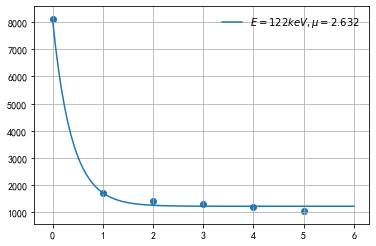

In [10]:
x_dense = np.linspace(0, 6, 100)
#plt.subplots(figsize = (16, 9))

plt.plot(x_dense, absorb_func(x_dense, popt_122[0], popt_122[1], popt_122[2]), label = r'$E=122keV,\mu = {:.3f}$'.format(popt_122[1]))
#plt.plot(x_dense, absorb_func(x_dense, popt_245[0], popt_245[1], popt_245[2]), label = r'$E=245keV,\mu = {:.3f}$'.format(popt_245[1]))
#plt.plot(x_dense, absorb_func(x_dense, popt_344[0], popt_344[1], popt_344[2]), label = r'$E=344keV,\mu = {:.3f}$'.format(popt_344[1]))
#plt.plot(x_dense, absorb_func(x_dense, popt_511[0], popt_511[1], popt_511[2]), label = r'$E=511keV,\mu = {:.3f}$'.format(popt_511[1]))
#plt.plot(x_dense, absorb_func(x_dense, popt_662[0], popt_662[1], popt_662[2]), label = r'$E=662keV,\mu = {:.3f}$'.format(popt_662[1]))
#plt.plot(x_dense, absorb_func(x_dense, popt_779[0], popt_779[1], popt_779[2]), label = r'$E=779keV,\mu = {:.3e}$'.format(popt_779[1]))
#plt.plot(x_dense, absorb_func(x_dense, popt_835[0], popt_835[1], popt_835[2]), label = r'$E=835keV,\mu = {:.3e}$'.format(popt_835[1]))

plt.scatter(d, E_122)
#plt.scatter(d, E_245)
#plt.scatter(d, E_344)
#plt.scatter(d, E_511)
#plt.scatter(d, E_662)
#plt.scatter(d, E_779)
#plt.scatter(d, E_835)
plt.grid()
plt.legend(frameon = False)
plt.show()

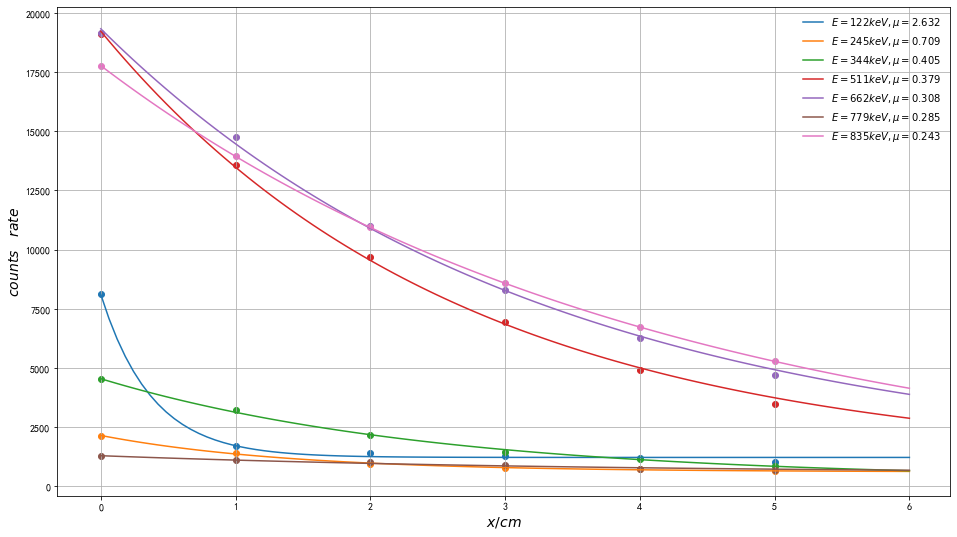

In [11]:
x_dense = np.linspace(0, 6, 100)
plt.subplots(figsize = (16, 9))

plt.plot(x_dense, absorb_func(x_dense, popt_122[0], popt_122[1], popt_122[2]), label = r'$E=122keV,\mu = {:.3f}$'.format(popt_122[1]))
plt.plot(x_dense, absorb_func(x_dense, popt_245[0], popt_245[1], popt_245[2]), label = r'$E=245keV,\mu = {:.3f}$'.format(popt_245[1]))
plt.plot(x_dense, absorb_func(x_dense, popt_344[0], popt_344[1], popt_344[2]), label = r'$E=344keV,\mu = {:.3f}$'.format(popt_344[1]))
plt.plot(x_dense, absorb_func(x_dense, popt_511[0], popt_511[1], popt_511[2]), label = r'$E=511keV,\mu = {:.3f}$'.format(popt_511[1]))
plt.plot(x_dense, absorb_func(x_dense, popt_662[0], popt_662[1], popt_662[2]), label = r'$E=662keV,\mu = {:.3f}$'.format(popt_662[1]))
plt.plot(x_dense, absorb_func(x_dense, popt_779[0], popt_779[1], popt_779[2]), label = r'$E=779keV,\mu = {:.3f}$'.format(popt_779[1]))
plt.plot(x_dense, absorb_func(x_dense, popt_835[0], popt_835[1], popt_835[2]), label = r'$E=835keV,\mu = {:.3f}$'.format(popt_835[1]))

plt.scatter(d, E_122)
plt.scatter(d, E_245)
plt.scatter(d, E_344)
plt.scatter(d, E_511)
plt.scatter(d, E_662)
plt.scatter(d, E_779)
plt.scatter(d, E_835)

plt.xlabel(r'$x/cm$', fontsize = 14)
plt.ylabel(r'$counts \quad rate$', fontsize = 14)
plt.grid()
plt.legend(frameon = False)
plt.show()

In [12]:
def f(x, a, b, c):
    return a * np.exp((-b) * x) + c

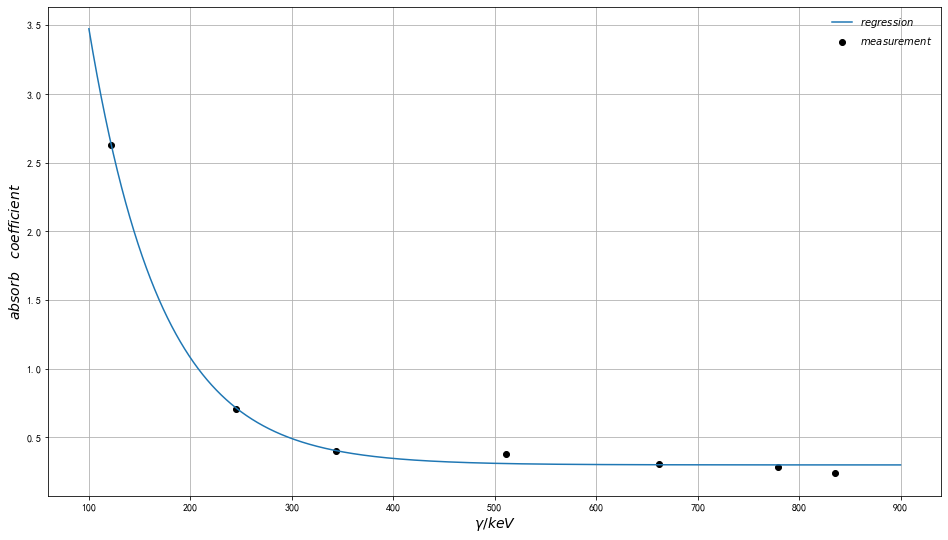

In [13]:
#mu = [popt_122[1], popt_245[1], popt_344[1], popt_511[1], popt_662[1], popt_779[1], popt_835[1]]
mu = [float(popt_122[1]), float(popt_245[1]), float(popt_344[1]), float(popt_511[1]), float(popt_662[1]), float(popt_779[1]), float(popt_835[1])]
E = [122, 245, 344, 511, 662, 779, 835]
E_dense = np.linspace(100, 900, 10000)
#不同类型的数不能操作，无法拟合(numpy.float64与int)

popt_NaI, pcov_NaI = curve_fit(f, E, mu, bounds = ([0, 0, 0], [1000, 0.1, 0.3]))

plt.subplots(figsize = (16,9))
plt.scatter(E, mu, c = 'k', label = r'$measurement$')
plt.plot(E_dense, f(E_dense, popt_NaI[0], popt_NaI[1], popt_NaI[2]), label = r'$regression$')
plt.xlabel(r'$\gamma/keV$', fontsize = 14)
plt.ylabel(r'$absorb \quad coefficient$', fontsize = 14)

plt.legend(frameon = False)
plt.grid()
plt.show()

由$\epsilon=1-e^{\mu(E(\theta))\cdot x}$,则对于$\theta=0$的情况

In [14]:
def efficiency(mu, x):
    return 1-np.exp((-mu) * x) ##注意算符的先后顺序！！！

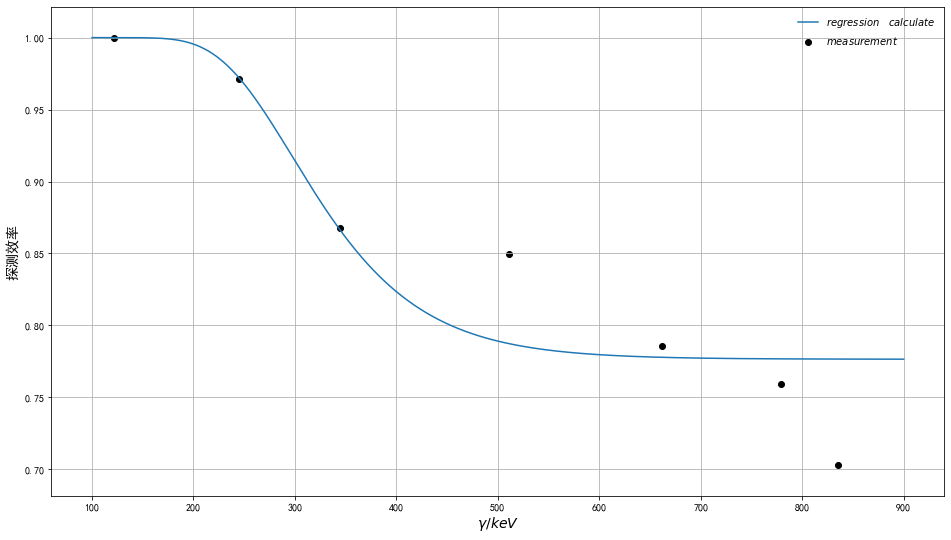

In [36]:
ab_c = f(np.array(E_dense)[:], popt_NaI[0], popt_NaI[1], popt_NaI[2])

plt.subplots(figsize = (16,9))
plt.scatter(np.array(E)[:], efficiency(np.array(mu)[:], 5), c = 'k', label = r'$measurement$')
 
plt.plot(np.array(E_dense)[:], efficiency(np.array(ab_c), 5), label = r'$regression \quad calculate$')

plt.xlabel(r'$\gamma/keV$', fontsize = 14)
plt.ylabel('探测效率', fontsize = 14)
plt.legend(frameon = False)
plt.grid()
plt.show()

### 康普顿散射验证

In [16]:
theta = [20, 40, 60, 80, 100, 120]
counts = [43872, 28172, 17012, 12107, 10583, 10115]
t = [70, 70, 70, 70, 70, 70]
counts_rate = [626.74, 402.46, 243.03, 172.96, 151.19, 144.50]
gamma = [613.74, 506.54, 399.88, 317.87, 261.25, 222.84]

### 散射光子能量关于入射光子能量和散射角的关系$hv'=\frac{hv}{1+\frac{hv}{m_0 c^2}(1-cos\theta)}$

In [54]:
popt_Et[1]/popt_Et[0]

505.0039049286488

In [17]:
def Energy_theta(theta, a, b):
    return b/(1 + a * (1-np.cos(theta*2*np.pi/360))) #python是弧度制不是角度制

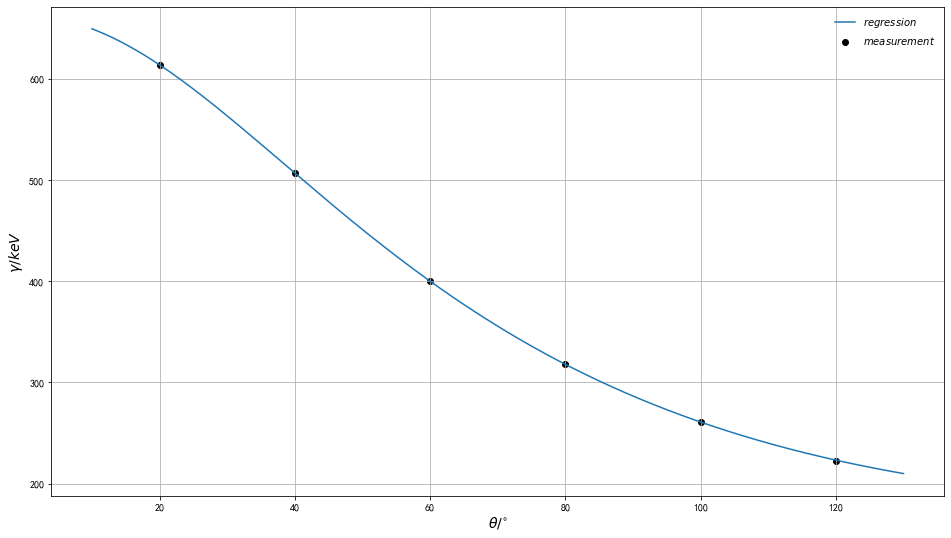

In [19]:
popt_Et, pcov_Et = curve_fit(Energy_theta, theta, gamma)#, bounds = ([0, 0, 0], [1000, 0.1, 0.3])
t_dense = np.linspace(10, 130, 1000)

plt.subplots(figsize = (16,9))
plt.scatter(theta, gamma, c = 'k', label = r'$measurement$')
plt.plot(t_dense, Energy_theta(t_dense, popt_Et[0], popt_Et[1]), label = r'$regression$')
plt.xlabel(r'$\theta/^{\circ}$', fontsize = 14)
plt.ylabel(r'$\gamma/keV$', fontsize = 14)

plt.legend(frameon = False)
plt.grid()
plt.show()

### 康普顿散射微分截面$\frac{d\sigma(\theta)}{d\Omega}=\frac{r_0}{2}\left(\frac{hv'}{hv}\right)^2\left(\frac{hv}{hv'}+\frac{hv'}{hv}-sin^2\theta\right)$

In [28]:
ds_do = (2.818e-13/2 * (613.74/662.16)**2 * (662.16/613.74 + 613.74/662.16 - (np.sin(20*2*np.pi/360))**2)) #零角度散射截面

def cross_section(theta, b):
    return (2.818e-13/2 * (b/662.16)**2 * (662.16/b + b/662.16 - (np.sin(theta*2.*np.pi/360.)**2)))/ds_do

In [32]:
hv = popt_Et[1]
hv_p0 = gamma#测量点对应的散射能量
cs_0 = []

##计算测量微分截面点 ###数据类型原因，要先在函数式中theta改成float(theta)
for i in range(len(theta)):
    cs_0.append(cross_section(theta[i], hv_p0[i])) #由于数据类型转化的问题，不方便使用数组的快速索引简化for循环


In [33]:
cs_0#测量点的相对微分截面

[1.0,
 0.5983125360474361,
 0.33933270918817254,
 0.22628155520248197,
 0.18795599388676335,
 0.1785389829994705]

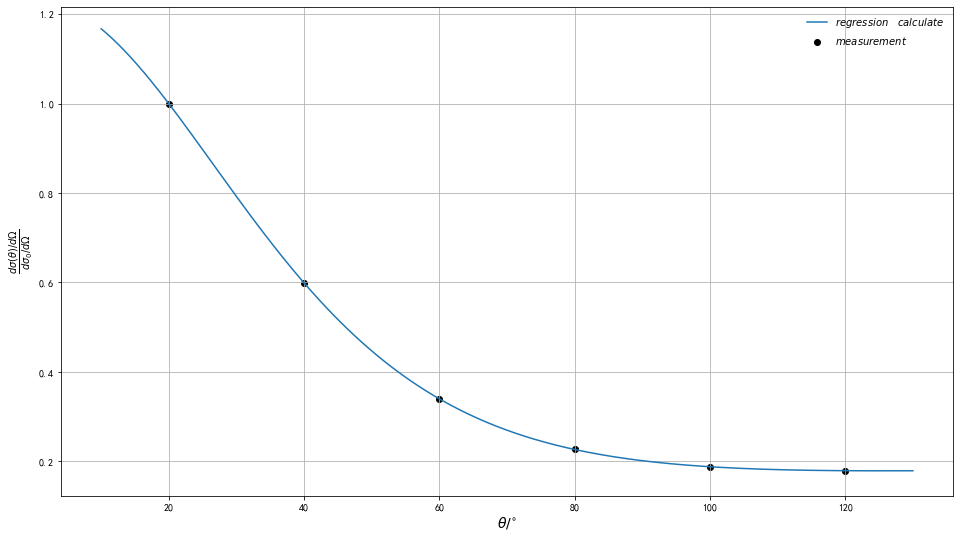

In [34]:

plt.subplots(figsize = (16,9))
plt.scatter(theta, cs_0, c = 'k', label = r'$measurement$')
plt.plot(t_dense, cross_section(t_dense, Energy_theta(t_dense, popt_Et[0], popt_Et[1])), label = r'$regression \quad calculate$')
plt.xlabel(r'$\theta/^{\circ}$', fontsize = 14)
plt.ylabel(r'$\frac{d\sigma(\theta)/d\Omega}{d\sigma_0/d\Omega}$', fontsize = 14)

plt.legend(frameon = False)
plt.grid()
plt.show()

##### NaI材料效率计算

In [25]:
ef = []
for i in range(len(gamma)):
    ef.append(f(gamma[i], popt_NaI[0], popt_NaI[1], popt_NaI[2]))
ef

[0.3020429223938413,
 0.3102730778025319,
 0.3469490621593527,
 0.449035842846769,
 0.6302096457111033,
 0.8662458206161641]

In [26]:
efficiency(np.array(ef)[:], 5)

array([0.77913743, 0.78804163, 0.82355487, 0.89409144, 0.95719277,
       0.98684863])